### Interest Rate Modeling with Vasicek Model

In [12]:
import pandas as pd
import numpy as np
import scipy as si
from scipy import stats
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
np.random.seed(1)

In [13]:
# Read in the data
interest_rates = pd.read_csv(r"daily-treasury-rates.csv", parse_dates=["Date"])

In [14]:
interest_rates.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-09-08,5.52,5.56,5.55,5.60,5.49,5.42,4.98,4.68,4.39,4.35,4.26,4.52,4.33
1,2023-09-07,5.52,5.56,5.53,5.59,5.50,5.40,4.94,4.66,4.38,4.35,4.27,4.55,4.36
2,2023-09-06,5.52,5.55,5.55,5.60,5.52,5.44,5.01,4.73,4.44,4.39,4.30,4.56,4.37
3,2023-09-05,5.51,5.56,5.55,5.59,5.51,5.42,4.94,4.65,4.37,4.35,4.27,4.56,4.38
4,2023-09-01,5.51,5.55,5.53,5.58,5.47,5.36,4.87,4.57,4.29,4.27,4.18,4.48,4.29


In [15]:
interest_rates.shape

(2924, 14)

In [16]:
# drop columns with NAs
interest_rates = interest_rates.dropna(axis = 1)

In [17]:
interest_rates.shape

(2924, 12)

In [18]:
interest_rates.head()

,Date,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-09-08,5.52,5.55,5.49,5.42,4.98,4.68,4.39,4.35,4.26,4.52,4.33
1,2023-09-07,5.52,5.53,5.50,5.40,4.94,4.66,4.38,4.35,4.27,4.55,4.36
2,2023-09-06,5.52,5.55,5.52,5.44,5.01,4.73,4.44,4.39,4.30,4.56,4.37
3,2023-09-05,5.51,5.55,5.51,5.42,4.94,4.65,4.37,4.35,4.27,4.56,4.38
4,2023-09-01,5.51,5.53,5.47,5.36,4.87,4.57,4.29,4.27,4.18,4.48,4.29


In [19]:
interest_rates = interest_rates.sort_values(by = ['Date'], ascending = True)
interest_rates

,Date,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
422,2012-01-03,0.01,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98
421,2012-01-04,0.01,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03
420,2012-01-05,0.01,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06
419,2012-01-06,0.02,0.02,0.05,0.12,0.25,0.40,0.86,1.40,1.98,2.70,3.02
418,2012-01-09,0.01,0.01,0.05,0.11,0.26,0.38,0.85,1.39,1.98,2.70,3.02
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-09-01,5.51,5.53,5.47,5.36,4.87,4.57,4.29,4.27,4.18,4.48,4.29
3,2023-09-05,5.51,5.55,5.51,5.42,4.94,4.65,4.37,4.35,4.27,4.56,4.38
2,2023-09-06,5.52,5.55,5.52,5.44,5.01,4.73,4.44,4.39,4.30,4.56,4.37
1,2023-09-07,5.52,5.53,5.50,5.40,4.94,4.66,4.38,4.35,4.27,4.55,4.36


In [20]:
interest_rates_b = interest_rates.shift(+1)
interest_rates   = interest_rates.iloc[1:,]
interest_rates_b = interest_rates_b.dropna(axis = 0)

In [40]:
# ### Decide the parameters: a, b, sd
# a = 1
# b = 2.5
# sd = 1

In [41]:
# interest_rates['r(t)-r(t-1)']    = interest_rates['Short Term Interest Rates'] - interest_rates['Short Term Interest Rates'].shift(+1)
# interest_rates['Mean_Reversion'] = a*(b-interest_rates['Short Term Interest Rates'].shift(+1))
# interest_rates['Model_Mean']     = interest_rates['Short Term Interest Rates'] - interest_rates['Short Term Interest Rates'].shift(+1) - a*(b-interest_rates['Short Term Interest Rates'].shift(+1))  
# interest_rates = interest_rates.dropna(axis = 0)
# interest_rates

In [42]:
# interest_rates['pdf'] = stats.norm.logpdf(interest_rates['Model_Mean'], loc=0, scale=sd)  
# interest_rates.head()

In [43]:
# interest_rates_b

In [44]:
def Vasicek(params):
    a  = params[0]   
    b  = params[1]
    sd = params[2]
    
    sample_data = interest_rates['Short Term Interest Rates'] - interest_rates_b['Short Term Interest Rates'] - a*(b-interest_rates_b['Short Term Interest Rates'])
    
    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(sample_data, loc=0, scale=sd))

    return nll


initParams = [1, 2, 1]

results = minimize(Vasicek, initParams, method='Nelder-Mead')
print(results.x)

[0.01096312 4.39050049 0.55164702]


### Prediction

In [59]:
from numpy import random as rn

In [60]:
a = results.x[0]
b = results.x[1]
σ = results.x[2]

In [61]:
r0 = 5.49

In [62]:
T = 5

In [63]:
N = 60

In [64]:
δt = T/N
δt

0.08333333333333333

In [65]:
M = int(5*1e4)
M

50000

In [66]:
dz = rn.randn(M,N)

In [67]:
r = r0*np.ones((M,N+1))

In [68]:
for i in range(0,N):
    r[:,i+1] = r[:,i] + a*(b-r[:,i])*δt + σ*dz[:,i]*np.sqrt(δt)

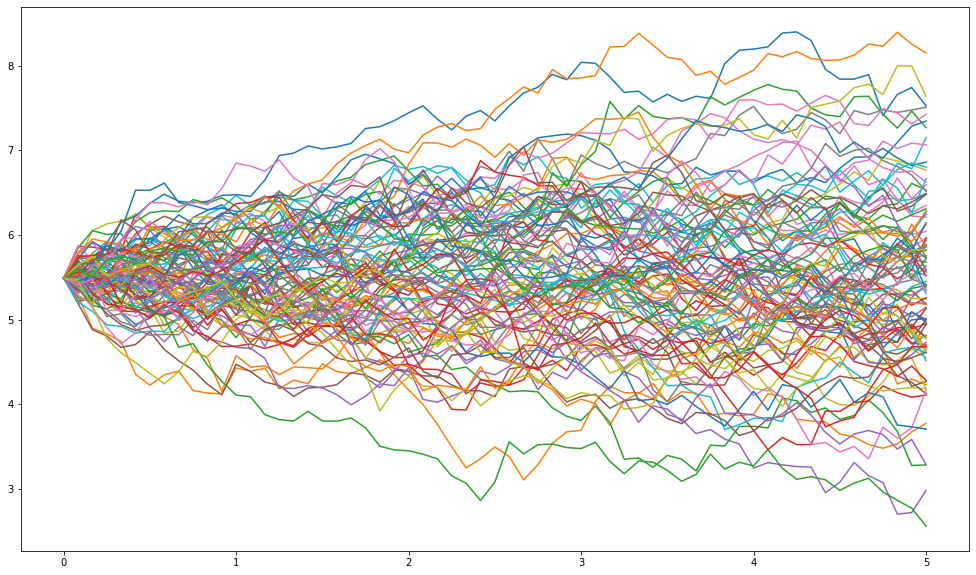

In [69]:
plt.figure(figsize=(17,10))

a = [ rn.randint(0,M) for j in range(1,100)]

for runer in a:
    plt.plot(np.arange(0,T+δt,δt),r[runer])

In [70]:
V = (r[:,-1])
print("The expected value for the interest rate is:", format(np.mean(V)))
print("The standard error of sample mean is:", format(np.std(V)/np.sqrt(M)))

The expected value for the interest rate is: 5.427045641905332
The standard error of sample mean is: 0.005368731499287976


In [71]:
from scipy.stats import norm
def normsinv(x):
    x = norm.ppf(x)
    return (x)

z = normsinv(0.975)
μ = np.mean(V)
SE = np.std(V)/np.sqrt(M)

print("Lower 95% is:",format( (μ-z*SE) ))
print("Upper 95% is:",format( (μ+z*SE) ))

Lower 95% is: 5.416523121524062
Upper 95% is: 5.437568162286603


In [ ]:
from numpy import random as rn
a = results.x[0]
b = results.x[1]
σ = results.x[2]
r0 = 0.01
T = 10
N = 120
δt = T/N
M = int(5*1e4)

In [ ]:
dz = rn.randn(M,N)
r = r0*np.ones((M,N+1))
for i in range(0,N):
    r[:,i+1] = r[:,i] + a*(b-r[:,i])*δt + σ*dz[:,i]*np.sqrt(δt)

In [ ]:
plt.figure(figsize=(17,10))
a = [ rn.randint(0,M) for j in range(1,100)]
for runer in a:
    plt.plot(np.arange(0,T+δt,δt)[:-1],r[runer])

In [ ]:
pred_mean = np.mean(r, axis=0)
pred_SE   = np.ones(121)

def normsinv(x):
    x = si.stats.norm.ppf(x)
    return (x)

z = normsinv(0.975)
for i in range(1,121):
    pred_SE[i] = z*np.std(r[:i])/np.sqrt(i)

In [ ]:
plt.figure(figsize=(17,10))
plt.plot(np.arange(0,T+δt,δt)[:-1],pred_mean - pred_SE)
plt.plot(np.arange(0,T+δt,δt)[:-1],pred_mean)
plt.plot(np.arange(0,T+δt,δt)[:-1],pred_mean + pred_SE)

In [ ]:
# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the training data
ax.plot(
    ARtrain_data["Short Term Interest Rates"],
    label="Training Data",
    color="blue",
    linewidth=2,
)

# Plot the testing data
ax.plot(
    ARtest_data.index,
    ARtest_data["Short Term Interest Rates"],
    label="Test Data",
    color="green",
    linewidth=2,
)

# Plot the predicted rates
ax.plot(
    ARtest_data.index,
    pred_mean[1:],
    label="Vasicek Forecasted Interest Rates",
    linewidth=2,
    color="orange",
)

# Set the title and labels
ax.set_title(
    "Actual vs Vasicek Forecasted Differenced Short Term Interest Rates", fontsize=16
)
ax.set_xlabel("Time (days)", fontsize=14)
ax.set_ylabel("Interest Rates", fontsize=14)

# Show the legend
ax.legend(fontsize=12)

# Automatically adjust subplot params so that the subplot fits into the figure area
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot as an image
fig.savefig("Vasicek_result.png")